# Objectives:
    1. Top 10 Districts in terms of overall Test Performance.
    2. Top 10 Districts in terms of each subject category in the test.

## First let's try to explore the data available to achieve the first objective

In [208]:
#Importing necessary Python libraries and the datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_excel('/home/pardeeprassani/Documents/Raw-Data/SRB_Result.xlsx')
answers = pd.read_excel("/home/pardeeprassani/Documents/Raw-Data/answers_Combined.xlsx")
answer_key = pd.read_excel("/home/pardeeprassani/Documents/Raw-Data/answer_Key.xlsx")
only_answers = pd.read_excel("/home/pardeeprassani/Documents/Raw-Data/only_answers.xlsx")

In [83]:
data.head()

Seat#                  Name             CNIC Test_Center  Correct  \
0  10551             Ahmad Ali  42301-3568648-3     Karachi       80   
1  20220  Memoona Shah  Rashdi  45204-3495759-0   Hyderabad       77   
2  10504   Sahil Kumar Mandhan  43503-0409844-9     Karachi       76   
3  10188     Mehreen Irfan Ali  42301-2953960-2     Karachi       75   
4  12405            Darban Ali  45203-7833495-1      Sukkur       75   

   Incorrect  Missing  Total_Score  
0         20        0           80  
1         23        0           77  
2         24        0           76  
3         24        1           75  
4         25        0           75

In [75]:
data.isnull().sum()

Seat#          0
Name           0
CNIC           1
Test_Center    0
Correct        0
Incorrect      0
Missing        0
Total_Score    0
dtype: int64

In [76]:
data['Test_Center'].value_counts()

Karachi      951
Hyderabad    823
Sukkur       675
Name: Test_Center, dtype: int64

In [77]:
data.Test_Center.value_counts(normalize=True)

Karachi      0.388322
Hyderabad    0.336056
Sukkur       0.275623
Name: Test_Center, dtype: float64

In [78]:
data[data['Total_Score']>=70]

Seat#                    Name             CNIC Test_Center  Correct  \
0   10551               Ahmad Ali  42301-3568648-3     Karachi       80   
1   20220    Memoona Shah  Rashdi  45204-3495759-0   Hyderabad       77   
2   10504     Sahil Kumar Mandhan  43503-0409844-9     Karachi       76   
3   10188       Mehreen Irfan Ali  42301-2953960-2     Karachi       75   
4   12405              Darban Ali  45203-7833495-1      Sukkur       75   
5   10769               Arif  Ali  45202-7752447-9     Karachi       73   
6   10799    Irfan Muhammad Saleh  42301-9445599-7     Karachi       73   
7   12084             Aroon Kumar  45502-0861429-9      Sukkur       73   
8   11270          Abdul Khalique  41205-8246748-3   Hyderabad       72   
9   10035   Muhammad Talha Vistro  41306-7846877-9     Karachi       72   
10  10371    Rakesh Kumar Nangdev  45502-7307564-7     Karachi       72   
11  10540       Aadil Khan Jakhro  43201-3398118-3     Karachi       72   
12  12088  Muzzamil Hussain Lohar  43304-5058653-9      Sukkur       71   

    Incorrect  Missing  Total_Score  
0          20        0           80  
1          23        0           77  
2          24        0           76  
3          24        1           75  
4          25        0           75  
5          27        0           73  
6          27        0           73  
7          27        0           73  
8          27        1           72  
9          28        0           72  
10         28        0           72  
11         26        2           72  
12         29        0           71

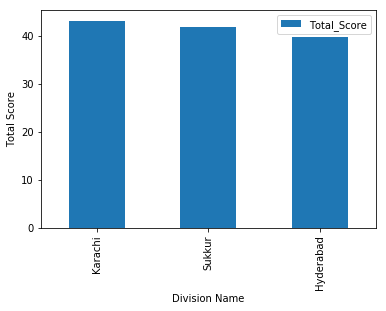

Total_Score
Test_Center             
Karachi        43.052576
Sukkur         41.826667
Hyderabad      39.608748

In [80]:
grouping_by_division = data[['Test_Center','Total_Score']].groupby('Test_Center').mean().sort_values(['Total_Score'],ascending=False)
grouping_by_division.plot(kind="bar") 
plt.xlabel('Division Name')
plt.ylabel('Total Score')
plt.show()
grouping_by_division

In [ ]:
grouping_by_division2 = data[['Test_Center','Incorrect']].groupby('Test_Center').mean().sort_values(['Incorrect'],ascending=False)
#grouping_by_division.plot(kind="bar") 
#plt.xlabel('Division Name')
#plt.ylabel('Total Score')
#plt.show()
grouping_by_division2

In [ ]:
grouping_by_division2 = data[['Test_Center','Missing']].groupby('Test_Center').mean().sort_values(['Missing'],ascending=False)
grouping_by_division2

In [85]:
division_district_code = data['CNIC']
division_district_code.shape

(2449,)

In [86]:
division_district_code2 = pd.DataFrame({'CNIC':data.CNIC.str.slice(1, 3)})

In [87]:
division_district_code2.head()

CNIC
0   23
1   52
2   35
3   23
4   52

In [ ]:
division_district_code2.groupby(['CNIC']).count().sort_values(['CNIC'],ascending=True)

## Top 10 Districts
Shows the top 10 districts as per the total score of candidates.

In [ ]:
grouping_by_district = data[['District','Total_Score']].groupby('District').median().sort_values(['Total_Score'],ascending=False)
grouping_by_district.plot(kind="bar") 
plt.xlabel('Division Name')
plt.ylabel('Total Score')
plt.show()
grouping_by_district[:10]

## Now let's explore the data to achieve the second objective.

In [209]:
data.head()

Seat#                  Name             CNIC Test_Center  Correct  \
0  10551             Ahmad Ali  42301-3568648-3     Karachi       80   
1  20220  Memoona Shah  Rashdi  45204-3495759-0   Hyderabad       77   
2  10504   Sahil Kumar Mandhan  43503-0409844-9     Karachi       76   
3  10188     Mehreen Irfan Ali  42301-2953960-2     Karachi       75   
4  12405            Darban Ali  45203-7833495-1      Sukkur       75   

   Incorrect  Missing  Total_Score  
0         20        0           80  
1         23        0           77  
2         24        0           76  
3         24        1           75  
4         25        0           75

In [22]:
answer_key.head()

Q# Answer               Subject
0   1      D  Analytical Reasoning
1   2      C  Analytical Reasoning
2   3      A  Analytical Reasoning
3   4      C  Analytical Reasoning
4   5      B  Analytical Reasoning

In [23]:
only_answers.head()

Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9 Q10 ...  Q91 Q92 Q93 Q94 Q95 Q96 Q97 Q98 Q99 Q100
0  D  C  B  C  C  A  B  B  C   D ...    D   B   B   C   A   B   B   B   C    B
1  D  C  B  D  C  A  A  D  D   C ...    D   B   B   D   C   B   B   D   A    B
2  A  C  B  C  C  D  D  A  C   A ...    D   B   B   D   A   B   D   D   B    B
3  B  B  C  D  C  C  B  A  D   D ...    D   A   B   C   A   A   D   D   B    A
4  A  D  C  D  C  D  C  C  C   D ...    A   D   C   D   D   B   C   D   A    C

[5 rows x 100 columns]

In [24]:
answers.head()

SEAT NO Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9       ...       Q95 Q96 Q97 Q98 Q99  \
0    11073  D  C  B  C  C  A  B  B  C       ...         A   B   B   B   C   
1    11074  D  C  B  D  C  A  A  D  D       ...         C   B   B   D   A   
2    11075  A  C  B  C  C  D  D  A  C       ...         A   B   D   D   B   
3    11077  B  B  C  D  C  C  B  A  D       ...         A   A   D   D   B   
4    11078  A  D  C  D  C  D  C  C  C       ...         D   B   C   D   A   

  Q100 Number Correct Number Incorrect Number Missing Objective Score  
0    B             45               55              0              45  
1    B             50               45              5              50  
2    B             29               71              0              29  
3    A             23               73              4              23  
4    C             34               54             12              34  

[5 rows x 105 columns]

In [25]:
df = pd.DataFrame(np.asarray(only_answers).T.tolist(), columns=[x for x in answers['SEAT NO']])

In [26]:
df.head()

11073   11074   11075   11077   11078   11079   11080   11081   11082    \
0       D       D       A       B       A       B       D       C       A   
1       C       C       C       B       D       C       C       B       C   
2       B       B       B       C       C       D       B       A       D   
3       C       D       C       D       D       C       D       B       B   
4       C       C       C       C       C       C       C       A       C   

  11083     ...   80003   80004   80005   80006   80007   80008   80009    \
0       A   ...         A       D       D       D       D       D       D   
1       C   ...         A       C       C       C       C       C       C   
2       B   ...         B       C       C       C       C       C       B   
3       D   ...         D       A       B       C       C       C       D   
4       C   ...         C       C       C       C       C       C       C   

  80010   90001   3340207  
0       D       C       D  
1       C       C       C  
2       D       D       A  
3       A       A       C  
4       C   BLANK       B  

[5 rows x 2449 columns]

In [27]:
dfx = df.join(answer_key)

In [28]:
dfx.head()

11073 11074 11075 11077 11078 11079 11080 11081 11082 11083  \
0     D     D     A     B     A     B     D     C     A     A   
1     C     C     C     B     D     C     C     B     C     C   
2     B     B     B     C     C     D     B     A     D     B   
3     C     D     C     D     D     C     D     B     B     D   
4     C     C     C     C     C     C     C     A     C     C   

           ...          80006 80007 80008 80009 80010  90001 3340207 Q#  \
0          ...              D     D     D     D     D      C       D  1   
1          ...              C     C     C     C     C      C       C  2   
2          ...              C     C     C     B     D      D       A  3   
3          ...              C     C     C     D     A      A       C  4   
4          ...              C     C     C     C     C  BLANK       B  5   

  Answer               Subject  
0      D  Analytical Reasoning  
1      C  Analytical Reasoning  
2      A  Analytical Reasoning  
3      C  Analytical Reasoning  
4      B  Analytical Reasoning  

[5 rows x 2452 columns]

In [29]:
cols = dfx.columns
cols

Index([    11073,     11074,     11075,     11077,     11078,     11079,
           11080,     11081,     11082,     11083,
       ...
           80006,     80007,     80008,     80009,     80010,     90001,
         3340207,      'Q#',  'Answer', 'Subject'],
      dtype='object', length=2452)

In [30]:
unneeded = ['Q#','Answer','Subject']
for i in cols:
    if i not in unneeded:
        dfx[i] = dfx[i]== dfx['Answer']

In [31]:
dfxx = dfx
dfxx.head()

11073  11074  11075  11077  11078  11079  11080  11081  11082  11083  \
0   True   True  False  False  False  False   True  False  False  False   
1   True   True   True  False  False   True   True  False   True   True   
2  False  False  False  False  False  False  False   True  False  False   
3   True  False   True  False  False   True  False  False  False  False   
4  False  False  False  False  False  False  False  False  False  False   

           ...           80006  80007  80008  80009  80010  90001  3340207  \
0          ...            True   True   True   True   True  False     True   
1          ...            True   True   True   True   True   True     True   
2          ...           False  False  False  False  False  False     True   
3          ...            True   True   True  False  False  False     True   
4          ...           False  False  False  False  False  False     True   

   Q#  Answer               Subject  
0   1       D  Analytical Reasoning  
1   2       C  Analytical Reasoning  
2   3       A  Analytical Reasoning  
3   4       C  Analytical Reasoning  
4   5       B  Analytical Reasoning  

[5 rows x 2452 columns]

In [33]:
unneeded = ['Q#','Answer','Subject']
for i in cols:
    if i not in unneeded:
        dfxx.loc[dfxx[i]==True,i]=1
            #dfxx[i] = 1 

In [34]:
unneeded = ['Q#','Answer','Subject']
for i in cols:
    if i not in unneeded:
        dfxx.loc[dfxx[i]==False,i]=0

In [38]:
newDfxx=dfxx.drop(['Q#', 'Answer', 'Subject'], axis=1)

In [45]:
newDfxx.head()

11073    11074    11075    11077    11078    11079    11080    11081    \
0        1        1        0        0        0        0        1        0   
1        1        1        1        0        0        1        1        0   
2        0        0        0        0        0        0        0        1   
3        1        0        1        0        0        1        0        0   
4        0        0        0        0        0        0        0        0   

   11082    11083     ...     80003    80004    80005    80006    80007    \
0        0        0   ...           0        1        1        1        1   
1        1        1   ...           0        1        1        1        1   
2        0        0   ...           0        0        0        0        0   
3        0        0   ...           0        0        0        1        1   
4        0        0   ...           0        0        0        0        0   

   80008    80009    80010    90001    3340207  
0        1        1        1        0        1  
1        1        1        1        1        1  
2        0        0        0        0        1  
3        1        0        0        0        1  
4        0        0        0        0        1  

[5 rows x 2449 columns]

In [47]:
colss = newDfxx.columns
colss

Index([  11073,   11074,   11075,   11077,   11078,   11079,   11080,   11081,
         11082,   11083,
       ...
         80003,   80004,   80005,   80006,   80007,   80008,   80009,   80010,
         90001, 3340207],
      dtype='object', length=2449)

In [63]:
subjectScore = pd.DataFrame([], index=['Analytical', 'Verbal', 'Quantitative', 'CAffairs'], columns=colss)
subjectScore.head()

11073   11074   11075   11077   11078   11079   11080   11081    \
Analytical       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Verbal           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Quantitative     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
CAffairs         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

             11082   11083     ...   80003   80004   80005   80006   80007    \
Analytical       NaN     NaN   ...       NaN     NaN     NaN     NaN     NaN   
Verbal           NaN     NaN   ...       NaN     NaN     NaN     NaN     NaN   
Quantitative     NaN     NaN   ...       NaN     NaN     NaN     NaN     NaN   
CAffairs         NaN     NaN   ...       NaN     NaN     NaN     NaN     NaN   

             80008   80009   80010   90001   3340207  
Analytical       NaN     NaN     NaN     NaN     NaN  
Verbal           NaN     NaN     NaN     NaN     NaN  
Quantitative     NaN     NaN     NaN     NaN     NaN  
CAffairs         NaN     NaN     NaN     NaN     NaN  

[4 rows x 2449 columns]

In [67]:
#newDfxx[11073][:40].sum()

In [65]:
rowss = ['Analytical', 'Verbal', 'Quantitative', 'CAffairs']
for i in rowss:
    for j in colss:
        if i =='Analytical':
            subjectScore.loc[i][j]=newDfxx[j][:40].sum()
        elif i=='Verbal':
            subjectScore.loc[i][j]=newDfxx[j][40:60].sum()
        elif i=='Quantitative':
            subjectScore.loc[i][j]=newDfxx[j][60:90].sum()
        else:
            subjectScore.loc[i][j]=newDfxx[j][90:100].sum()

In [237]:
subjectScore=subjectScore.reindex(sorted(subjectScore.columns), axis=1)

In [238]:
subjectScore.head()

10002   10004   10005   10006   10007   10008   10009   10010    \
Analytical        17      24      22      24      23      27      21      20   
Verbal             9       7       7      15       7      11       8       8   
Quantitative      14      13      20      25      14      11      16      17   
CAffairs           6       4       5       4       3       8       5       4   

             10012   10013     ...   80003   80004   80005   80006   80007    \
Analytical        20      15   ...        18      19      22      19      23   
Verbal             5       8   ...         8       9       6       8       7   
Quantitative       5       9   ...        11      13      16       6      16   
CAffairs           5       5   ...         4       3       4       3       3   

             80008   80009   80010   90001   3340207  
Analytical        22      15      17      13      24  
Verbal            11       3       6       5       9  
Quantitative      18       2       7       5      14  
CAffairs           3       3       4       4       4  

[4 rows x 2449 columns]

In [246]:
data.head()

Seat#           Name             CNIC District_Code Test_Center  Correct  \
0  10002  Najma Shabeer  42401-7022904-6            24     Karachi       46   
1  10004  Ghalia Yousif  42101-9487061-2            21     Karachi       48   
2  10005   Mathan Kumar  44101-2156578-5            41     Karachi       54   
3  10006    Emil Farooq  42301-9906971-6            23     Karachi       68   
4  10007     Hira Jatoi  45504-8942137-4            55     Karachi       47   

   Incorrect  Missing  Analytical  Verbal  Quantitative  CAffairs  Total_Score  
0         51        3          17       9            14         6           46  
1         52        0          24       7            13         4           48  
2         46        0          22       7            20         5           54  
3         31        1          24      15            25         4           68  
4         53        0          23       7            14         3           47

# Top 10 Districts Subject-wise

In [250]:
grouping_by_Analytical = data[['District_Code','Analytical']].groupby('District_Code').median().sort_values(['Analytical'],ascending=False)

In [253]:
grouping_by_Verbal = data[['District_Code','Verbal']].groupby('District_Code').median().sort_values(['Verbal'],ascending=False)

In [254]:
grouping_by_Quantitative = data[['District_Code','Quantitative']].groupby('District_Code').median().sort_values(['Quantitative'],ascending=False)

In [255]:
grouping_by_CAffairs = data[['District_Code','CAffairs']].groupby('District_Code').median().sort_values(['CAffairs'],ascending=False)

In [256]:
grouping_by_Analytical.head()

Analytical
District_Code            
74                   23.5
71                   21.0
18                   21.0
46                   20.0
35                   20.0

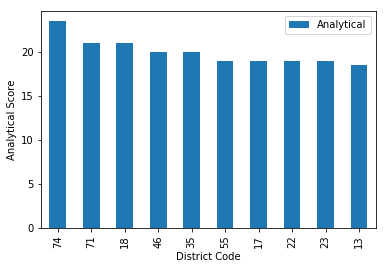

Analytical
District_Code            
74                   23.5
71                   21.0
18                   21.0
46                   20.0
35                   20.0
55                   19.0
17                   19.0
22                   19.0
23                   19.0
13                   18.5

In [252]:
grouping_by_Analytical[:10].plot(kind="bar",) 
plt.xlabel('District Code')
plt.ylabel('Analytical Score')
plt.show()
grouping_by_Analytical[:10]

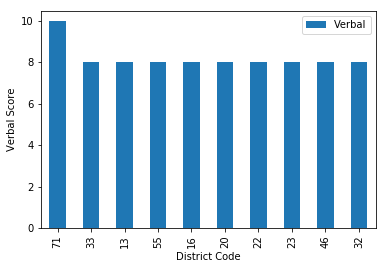

Verbal
District_Code        
71               10.0
33                8.0
13                8.0
55                8.0
16                8.0
20                8.0
22                8.0
23                8.0
46                8.0
32                8.0

In [259]:
grouping_by_Verbal[:10].plot(kind="bar") 
plt.xlabel('District Code')
plt.ylabel('Verbal Score')
plt.show()
grouping_by_Verbal[:10]

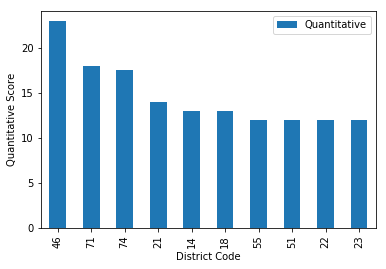

Quantitative
District_Code              
46                     23.0
71                     18.0
74                     17.5
21                     14.0
14                     13.0
18                     13.0
55                     12.0
51                     12.0
22                     12.0
23                     12.0

In [260]:
grouping_by_Quantitative[:10].plot(kind="bar") 
plt.xlabel('District Code')
plt.ylabel('Quantitative Score')
plt.show()
grouping_by_Quantitative[:10]

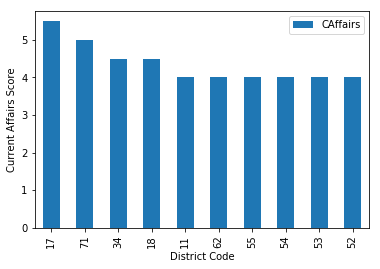

CAffairs
District_Code          
17                  5.5
71                  5.0
34                  4.5
18                  4.5
11                  4.0
62                  4.0
55                  4.0
54                  4.0
53                  4.0
52                  4.0

In [261]:
grouping_by_CAffairs[:10].plot(kind="bar") 
plt.xlabel('District Code')
plt.ylabel('Current Affairs Score')
plt.show()
grouping_by_CAffairs[:10]

In [206]:
# data=data.drop(['Verbal', 'Quantitative', 'CAffairs'], axis=1)

In [93]:
# unneeded = ['Q#','Answer','Subject']
# for i in cols:
#     if i not in unneeded:
#         print(i, zfxx[i][:39].sum())

In [152]:
#subjectScore.to_excel("/home/pardeeprassani/Documents/Raw-Data/subjectwise_Score.xlsx")

In [202]:
# data.insert(loc=10,column='Verbal',value=verbal_Score.T.Verbal.values.tolist())
# data.insert(loc=11,column='Quantitative',value=quantitative_Score.T.Quantitative.values.tolist())
# data.insert(loc=12,column='CAffairs',value=cAffairs_Score.T.CAffairs.values.tolist())

In [234]:
# verbal_Score.T.Verbal.values.tolist()

In [215]:
# data.insert(loc=8,column='Analytical',value=analytical_Score.T.Analytical.values.tolist())
# data.insert(loc=3,column='District_Code',value=division_district_code2['CNIC'].values.tolist())
#division_district_code2['CNIC'].values.tolist()

In [243]:
#data=data.reset_index(drop=True)
#data=data.drop(['Analytical','Verbal','Quantitative','CAffairs'], axis=1)

In [245]:
# data.insert(loc=8,column='Analytical',value=subjectScore.T.Analytical.values.tolist())
# data.insert(loc=9,column='Verbal',value=subjectScore.T.Verbal.values.tolist())
# data.insert(loc=10,column='Quantitative',value=subjectScore.T.Quantitative.values.tolist())
# data.insert(loc=11,column='CAffairs',value=subjectScore.T.CAffairs.values.tolist())